In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

Introduction

1.2 What is CNN ?

image.pngCNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D!
[download.png](attachment:1a7d7553-a0df-4889-9580-f176cc92d924.png) matrix like images. CNN's are typically used for image detection and classification.

1.3 What is Transfer Learning ?

image.png
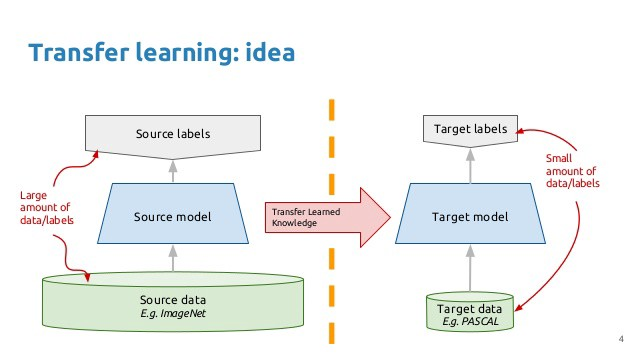

1.2 What is CNN ?

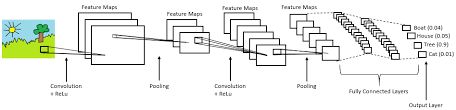

CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification

In [21]:
#importing libraries
import os
Dataset="/kaggle/input/face-mask-dataset/data"
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['without_mask', 'with_mask']


In [22]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [23]:
images=[]
labels=[]
img_rows=112
img_cols=112
for category in Data_Dir:
    folder_path=os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        
        try:
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
         #resizing the gray scaled images into 56x56 to keep size of the image consistent
            resized_img=cv2.resize(grayscale_img,(img_rows,img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception: ',e)
            
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_cols,1))
        
#perform one hot encoding 
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)
(train_X,test_X,train_y,test_y)=train_test_split(images,labels,test_size=0.25,random_state=0)

In [24]:
num_classes=2
batch_size=32

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

In [26]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 110, 110, 64)      640       
                                                                 
 activation_2 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 activation_3 (Activation)   (None, 53, 53, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                  

In [30]:
from keras.optimizers import Adam

epoch=8
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])


In [32]:
train_X

array([[[[0.99215686],
         [0.99215686],
         [0.99607843],
         ...,
         [0.97254902],
         [0.94117647],
         [0.94901961]],

        [[0.99607843],
         [0.99607843],
         [0.99607843],
         ...,
         [0.97254902],
         [0.94117647],
         [0.95294118]],

        [[0.99215686],
         [0.99607843],
         [0.99607843],
         ...,
         [0.98039216],
         [0.98431373],
         [0.98431373]],

        ...,

        [[0.09803922],
         [0.08235294],
         [0.06666667],
         ...,
         [0.08235294],
         [0.10980392],
         [0.13333333]],

        [[0.10588235],
         [0.08627451],
         [0.06666667],
         ...,
         [0.0745098 ],
         [0.09803922],
         [0.09803922]],

        [[0.09019608],
         [0.08627451],
         [0.08235294],
         ...,
         [0.08627451],
         [0.10196078],
         [0.10196078]]],


       [[[0.94509804],
         [0.94509804],
         [0.94

In [28]:
fitted_model=model.fit(
train_X,
train_y,
epochs=epoch,
validation_split=0.25)

Epoch 1/8
133/133 [==============================] - 108s 805ms/step - loss: 0.6321 - accuracy: 0.6542 - val_loss: 0.5749 - val_accuracy: 0.7168
Epoch 2/8
133/133 [==============================] - 107s 804ms/step - loss: 0.4970 - accuracy: 0.7566 - val_loss: 0.4556 - val_accuracy: 0.7903
Epoch 3/8
133/133 [==============================] - 108s 815ms/step - loss: 0.3316 - accuracy: 0.8606 - val_loss: 0.4367 - val_accuracy: 0.8023
Epoch 4/8
133/133 [==============================] - 107s 808ms/step - loss: 0.2342 - accuracy: 0.9068 - val_loss: 0.3764 - val_accuracy: 0.8383
Epoch 5/8
133/133 [==============================] - 107s 805ms/step - loss: 0.1631 - accuracy: 0.9339 - val_loss: 0.3845 - val_accuracy: 0.8679
Epoch 6/8
133/133 [==============================] - 107s 806ms/step - loss: 0.1072 - accuracy: 0.9607 - val_loss: 0.4168 - val_accuracy: 0.8771
Epoch 7/8
133/133 [==============================] - 107s 805ms/step - loss: 0.0789 - accuracy: 0.9718 - val_loss: 0.3674 - val_ac

In [29]:
model.save('fm.h5')